## Sample Set Spaces x LHS: Draftbox

In [10]:
from scipy.stats.qmc import QMCEngine
import numpy as np
from src.utils import plotLHS, concat
from src.eLHS import *

In [11]:
class RandomEngine(QMCEngine):
    def __init__(self, d, seed=None):
        super().__init__(d=d, seed=seed)


    def _random(self, n=1, *, workers=1):
        return self.rng.random((n, self.d))


    def reset(self):
        super().__init__(d=self.d, seed=self.rng_seed)
        return self


    def fast_forward(self, n):
        self.random(n)
        return self


In [12]:
P = 2
sampler = RandomEngine(P)

Grade:  13/20


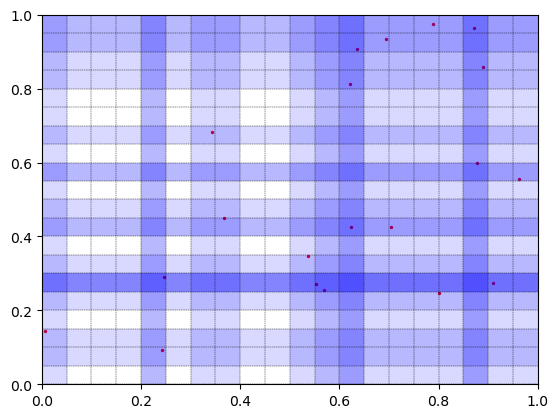

In [52]:
N, M = 20, 10
ss1 = sampler.random(N)
gr1 = lhs_grader(ss1)
print("Grade: ", str(gr1) + "/" + str(N))
plotLHS(ss1, True, True)


Grade:  25/30


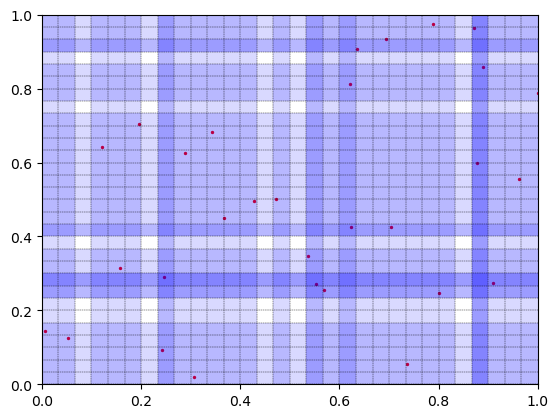

In [53]:
exp1 = eLHS(ss1, M, fullGraded = False)
eLHS1 = concat(ss1, exp1["expansion"])
print("Grade: ", str(exp1["grade"]) + "/" + str(N + M))
plotLHS(eLHS1, True, True)